## Clasificador Bayesiano

Vamos a comparar contra un clasificador bayesiano para poder ver si lo mejoramos o no.



30.0
900


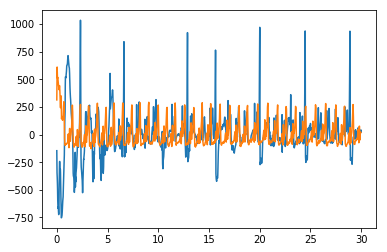

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#load data
import numpy as np

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

fs = 300. 
t = np.arange(len(X_train[0]))/fs
plt.plot(t,X_train[0,:])

#Es probable que tengamos un problema mal condicionado: vamos a realizar un submuestreo de la señal a 50 muestras por segundo
from scipy import signal

decimate = True

if decimate:
    freq = fs/10#Hz
    print(freq)
    secs = len(X_train[200])/fs
    samps = int(secs*freq)
    c = 0
    X_new = np.zeros((X_train.shape[0],samps))
    X_new_test = np.zeros((X_test.shape[0],samps))
    for x,x_test in zip(X_train,X_test):
        X_new[c,:] = signal.decimate(x,10)
        X_new_test[c,:] = signal.decimate(x_test,10)
    
        c += 1
    
    t = np.arange(len(X_new[200]))/freq
    plt.plot(t,X_new[200,:])
    print(len(X_new[0]))

    X_train = X_new.copy()
    X_test = X_new_test.copy()

## Vamos a probar dos modelos:
** 1.- sin utilizar normalización y centrado de los datos **

** 2.- Normalizando y centrando los datos **


### 1 Modelo sin normalización

In [2]:
#1 Sin normalizar

from sklearn.naive_bayes import GaussianNB
from time import time

from sklearn import metrics
#creamos el modelo
clf = GaussianNB()


#entrenamos el modelo
t0 = time()
clf.fit(X_train,y_train)
train_time = time() - t0
print("El tiempo de entrenamiento ha sido: %.2f"%(train_time))





El tiempo de entrenamiento ha sido: 0.08


In [3]:
#Predecimos con el modelo
t0 = time()
y_hat = clf.predict(X_test)
test_time = time() - t0
print("test time:  %0.3fs" % test_time)

#obtenemos el conjunto de metricas 

target_names = ['Normal','AF','Other','Noise']
score = metrics.accuracy_score(y_test, y_hat)
print("accuracy:   %0.3f" % score)
#report de metricas
print("classification report:")
print(metrics.classification_report(y_test, y_hat,target_names=target_names))


print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_hat))


#parece que simplemente elige una de las soluciones,debe ser por el problema del balanceado
from collections import Counter

#vamos a ver el número de elementos diferentes en y_test y en y_hat


print('"""""""""""""""""""""""""""""""""""""""""""""""""')
print('"""""""""""""""""""""""""""""""""""""""""""""""""')
print("y_test")
print(sorted(Counter(y_test).items()))

print("y_hat")
print(sorted(Counter(y_hat).items()))


test time:  0.033s
accuracy:   0.190
classification report:
             precision    recall  f1-score   support

     Normal       0.62      0.18      0.27       736
         AF       0.07      0.06      0.06       100
      Other       0.27      0.21      0.24       335
      Noise       0.03      0.84      0.06        25

avg / total       0.46      0.19      0.24      1196

confusion matrix:
[[130  55 156 395]
 [ 20   6  28  46]
 [ 59  26  70 180]
 [  1   1   2  21]]
"""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""
y_test
[(0, 736), (1, 100), (2, 335), (3, 25)]
y_hat
[(0, 210), (1, 88), (2, 256), (3, 642)]


In [4]:
#Vamos a probar balanceando con under sampling y over sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement=True)
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_sample(X_train, y_train)

print('"""""""""""""""""""""""""""""""""""""""""""""""""')
print('"""""""""""""""""""""""""""""""""""""""""""""""""')
print("y_resampled")
print(sorted(Counter(y_resampled).items()))

print("y_oversampled")
print(sorted(Counter(y_oversampled).items()))


print("y_train")
print(sorted(Counter(y_train).items()))

"""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""
y_resampled
[(0, 100), (1, 100), (2, 100), (3, 100)]
y_oversampled
[(0, 2942), (1, 2942), (2, 2942), (3, 2942)]
y_train
[(0, 2942), (1, 399), (2, 1340), (3, 100)]


## Results under sampling

accuracy:   0.160
classification report:
             precision    recall  f1-score   support

     Normal       0.70      0.03      0.06       736
         AF       0.11      0.14      0.12       100
      Other       0.27      0.40      0.32       335
      Noise       0.04      0.80      0.07        25

avg / total       0.51      0.16      0.14      1196

Confusion matrix, without normalization
[[ 23  70 315 328]
 [  2  14  45  39]
 [  8  40 134 153]
 [  0   1   4  20]]
Normalized confusion matrix
[[0.03 0.1  0.43 0.45]
 [0.02 0.14 0.45 0.39]
 [0.02 0.12 0.4  0.46]
 [0.   0.04 0.16 0.8 ]]


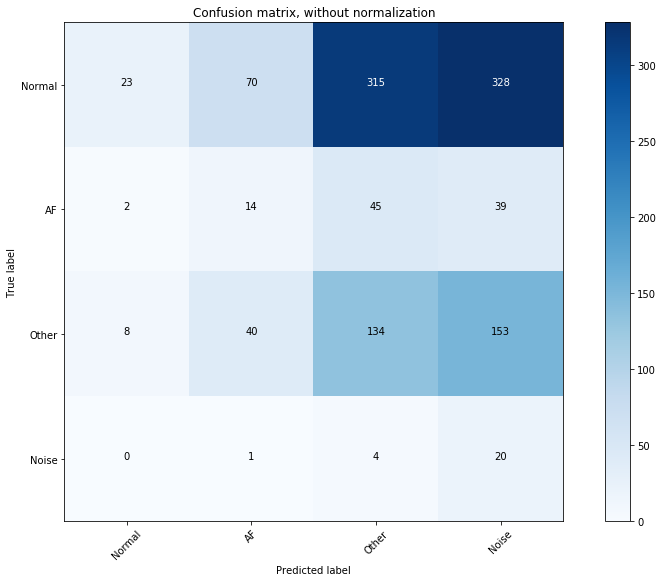

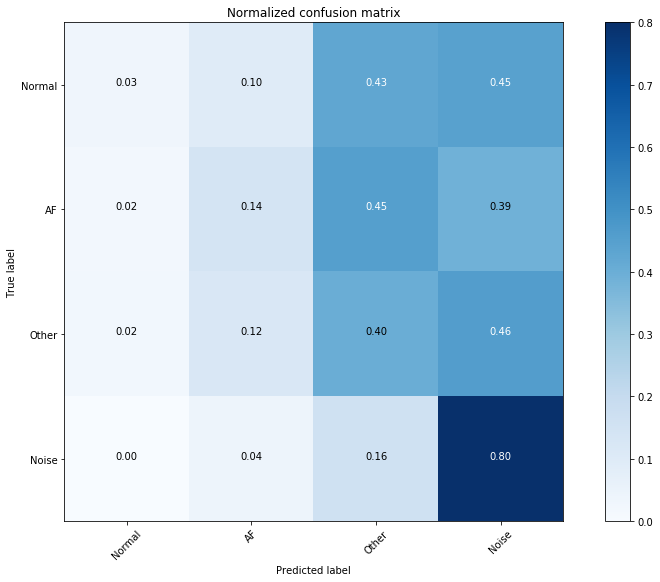

In [5]:
%matplotlib inline
#Resultados under sampling

clf_under = GaussianNB()

clf_under.fit(X_resampled,y_resampled)

y_hat_under = clf_under.predict(X_test)


target_names = ['Normal','AF','Other','Noise']
score = metrics.accuracy_score(y_test, y_hat_under)
print("accuracy:   %0.3f" % score)
#report de metricas
print("classification report:")
print(metrics.classification_report(y_test, y_hat_under,target_names=target_names))

from tfg_tools import *

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_hat_under)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (12,8))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
plt.figure(figsize = (12,8))
# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')



## Results Over sampling

accuracy:   0.217
classification report:
             precision    recall  f1-score   support

     Normal       0.64      0.27      0.38       736
         AF       0.07      0.07      0.07       100
      Other       0.27      0.09      0.14       335
      Noise       0.03      0.88      0.06        25

avg / total       0.47      0.22      0.28      1196

Confusion matrix, without normalization
[[199  59  67 411]
 [ 24   7  17  52]
 [ 89  27  31 188]
 [  1   1   1  22]]
Normalized confusion matrix
[[0.27 0.08 0.09 0.56]
 [0.24 0.07 0.17 0.52]
 [0.27 0.08 0.09 0.56]
 [0.04 0.04 0.04 0.88]]


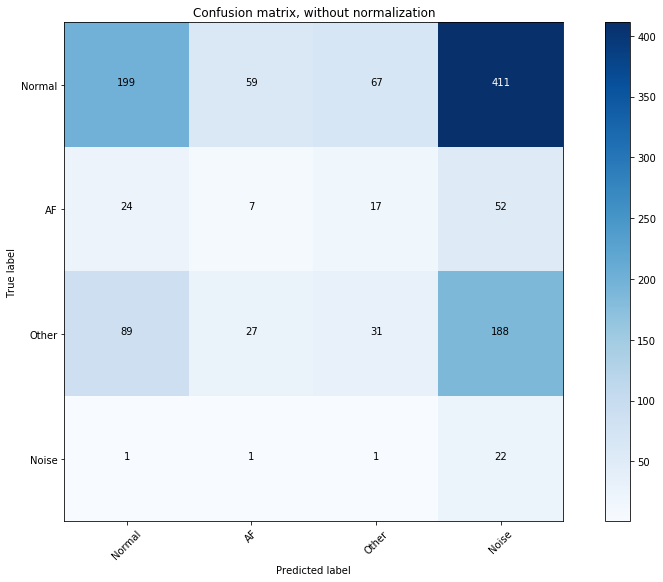

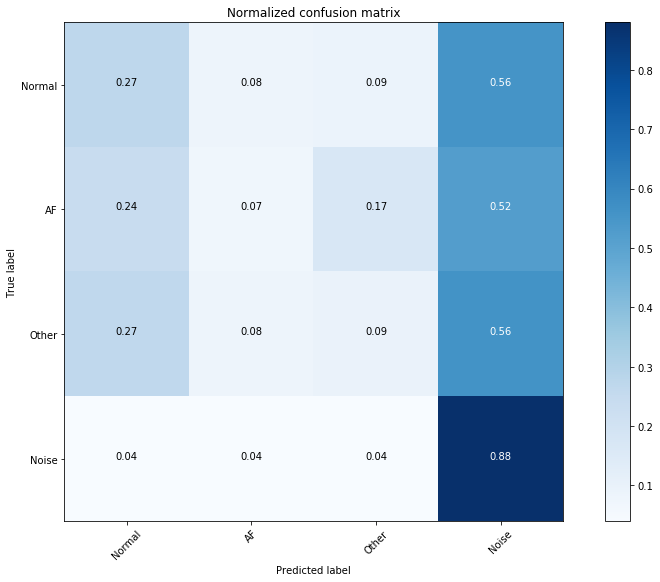

In [6]:
%matplotlib inline
#Resultados under sampling

clf_over = GaussianNB()

clf_over.fit(X_oversampled,y_oversampled)

y_hat_over = clf_over.predict(X_test)


target_names = ['Normal','AF','Other','Noise']
score = metrics.accuracy_score(y_test, y_hat_over)
print("accuracy:   %0.3f" % score)
#report de metricas
print("classification report:")
print(metrics.classification_report(y_test, y_hat_over,target_names=target_names))

from tfg_tools import *

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_hat_over)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (12,8))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')
plt.figure(figsize = (12,8))
# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

### 2. Modelo Normalizando

In [7]:
from sklearn.preprocessing import StandardScaler

#normalizamos train
my_scaler = StandardScaler()

X_train_n = my_scaler.fit_transform(X_train)
#entrenamos el modelo
t0 = time()
clf.fit(X_train_n,y_train)
train_time = time() - t0
print("El tiempo de entrenamiento ha sido: %.2f"%(train_time))



El tiempo de entrenamiento ha sido: 0.07


test time:  0.039s
accuracy:   0.190
classification report:
             precision    recall  f1-score   support

     Normal       0.62      0.18      0.27       736
         AF       0.07      0.06      0.06       100
      Other       0.27      0.21      0.24       335
      Noise       0.03      0.84      0.06        25

avg / total       0.46      0.19      0.24      1196

confusion matrix:
Confusion matrix, without normalization
[[130  55 156 395]
 [ 20   6  28  46]
 [ 59  26  70 180]
 [  1   1   2  21]]
"""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""
y_test
[(0, 736), (1, 100), (2, 335), (3, 25)]
y_hat
[(0, 210), (1, 88), (2, 256), (3, 642)]


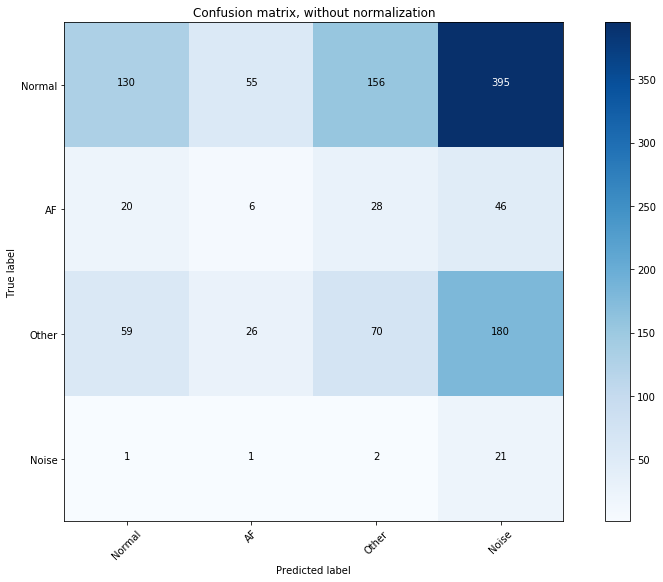

In [8]:
#Predecimos con el modelo

X_test_n = my_scaler.transform(X_test)

t0 = time()
y_hat_n = clf.predict(X_test_n)
test_time = time() - t0
print("test time:  %0.3fs" % test_time)

#obtenemos el conjunto de metricas 

target_names = ['Normal','AF','Other','Noise']
score = metrics.accuracy_score(y_test, y_hat_n)
print("accuracy:   %0.3f" % score)
#report de metricas
print("classification report:")
print(metrics.classification_report(y_test, y_hat_n,target_names=target_names))


print("confusion matrix:")
cnf_matrix = metrics.confusion_matrix(y_test, y_hat_n)
# Plot non-normalized confusion matrix
plt.figure(figsize = (12,8))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

#parece que simplemente elige una de las soluciones,debe ser por el problema del balanceado
from collections import Counter

#vamos a ver el número de elementos diferentes en y_test y en y_hat


print('"""""""""""""""""""""""""""""""""""""""""""""""""')
print('"""""""""""""""""""""""""""""""""""""""""""""""""')
print("y_test")
print(sorted(Counter(y_test).items()))

print("y_hat")
print(sorted(Counter(y_hat_n).items()))


In [9]:
#Undersmapling y oversampling con normalizados

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement=True)
X_resampled, y_resampled = rus.fit_sample(X_train_n, y_train)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_sample(X_train_n, y_train)

print('"""""""""""""""""""""""""""""""""""""""""""""""""')
print('"""""""""""""""""""""""""""""""""""""""""""""""""')
print("y_resampled")
print(sorted(Counter(y_resampled).items()))

print("y_oversampled")
print(sorted(Counter(y_oversampled).items()))


print("y_train")
print(sorted(Counter(y_train).items()))

"""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""
y_resampled
[(0, 100), (1, 100), (2, 100), (3, 100)]
y_oversampled
[(0, 2942), (1, 2942), (2, 2942), (3, 2942)]
y_train
[(0, 2942), (1, 399), (2, 1340), (3, 100)]


accuracy:   0.160
classification report:
             precision    recall  f1-score   support

     Normal       0.70      0.03      0.06       736
         AF       0.11      0.14      0.12       100
      Other       0.27      0.40      0.32       335
      Noise       0.04      0.80      0.07        25

avg / total       0.51      0.16      0.14      1196

Confusion matrix, without normalization
[[ 23  70 315 328]
 [  2  14  45  39]
 [  8  40 134 153]
 [  0   1   4  20]]


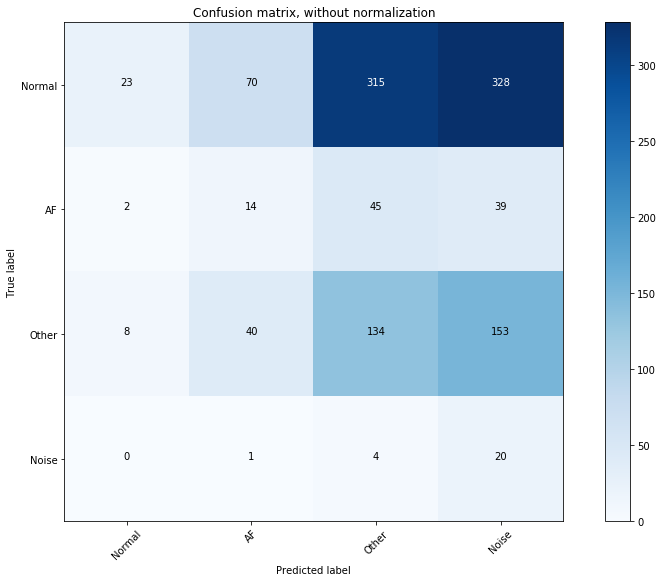

In [10]:
#undersampling con normalización de los datos

clf_under = GaussianNB()

clf_under.fit(X_resampled,y_resampled)


y_hat_under = clf_under.predict(X_test_n)


target_names = ['Normal','AF','Other','Noise']
score = metrics.accuracy_score(y_test, y_hat_under)
print("accuracy:   %0.3f" % score)
#report de metricas
print("classification report:")
print(metrics.classification_report(y_test, y_hat_under,target_names=target_names))

from tfg_tools import *

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_hat_under)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (12,8))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

## Regresión Logística

En último lugar vamos a utilizar regresión logística.



accuracy:   0.276
classification report:
             precision    recall  f1-score   support

     Normal       0.64      0.27      0.38       736
         AF       0.09      0.33      0.15       100
      Other       0.32      0.27      0.29       335
      Noise       0.01      0.12      0.02        25

avg / total       0.49      0.28      0.33      1196

Confusion matrix, without normalization
[[202 216 164 154]
 [ 23  33  29  15]
 [ 82 100  92  61]
 [ 11   4   7   3]]


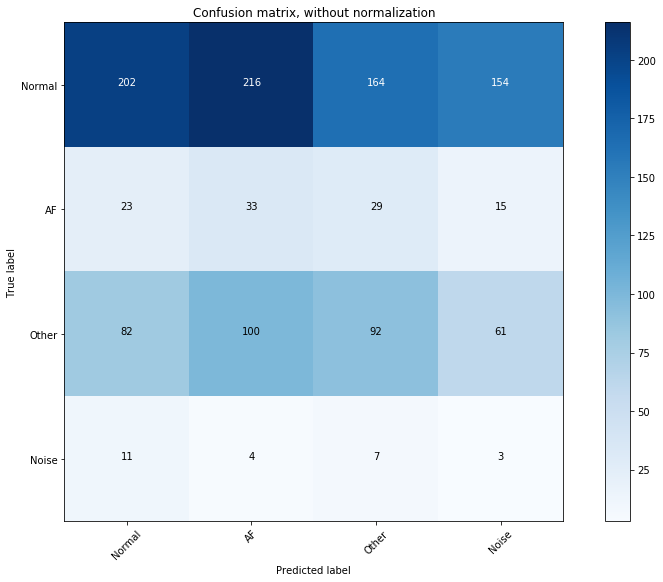

In [11]:
#Regresión logística multinomial

from sklearn.linear_model import LogisticRegression

lr_under = LogisticRegression(multi_class= 'multinomial',solver = 'lbfgs')

#Vamos a utilizar undersampling y oversampling normalizado

lr_under.fit(X_resampled,y_resampled)

y_hat_under = lr_under.predict(X_test_n)

target_names = ['Normal','AF','Other','Noise']
score = metrics.accuracy_score(y_test, y_hat_under)
print("accuracy:   %0.3f" % score)
#report de metricas
print("classification report:")
print(metrics.classification_report(y_test, y_hat_under,target_names=target_names))

from tfg_tools import *

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_hat_under)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (12,8))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

accuracy:   0.343
classification report:
             precision    recall  f1-score   support

     Normal       0.61      0.40      0.48       736
         AF       0.08      0.22      0.12       100
      Other       0.29      0.29      0.29       335
      Noise       0.00      0.00      0.00        25

avg / total       0.46      0.34      0.39      1196

Confusion matrix, without normalization
[[292 165 193  86]
 [ 42  22  32   4]
 [132  69  96  38]
 [ 15   5   5   0]]


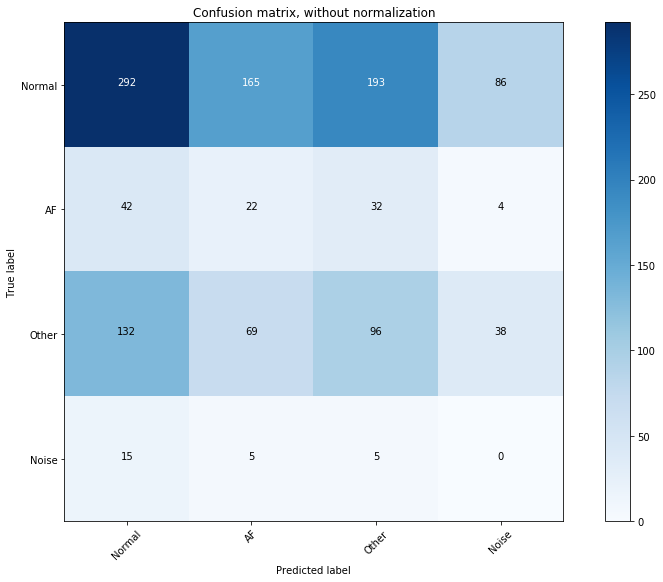

In [12]:

lr_over = LogisticRegression(multi_class= 'multinomial',solver = 'lbfgs')

#Vamos a utilizar undersampling y oversampling normalizado

lr_over.fit(X_oversampled,y_oversampled)

y_hat_over = lr_over.predict(X_test_n)

target_names = ['Normal','AF','Other','Noise']
score = metrics.accuracy_score(y_test, y_hat_over)
print("accuracy:   %0.3f" % score)
#report de metricas
print("classification report:")
print(metrics.classification_report(y_test, y_hat_over,target_names=target_names))

from tfg_tools import *

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_hat_over)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (12,8))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')